# Feature Selection Methods Tutorial
This notebook demonstrates filter, wrapper, and embedded methods for feature selection using the Breast Cancer dataset.

## Step 1: Import Required Libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


## Step 2: Load and Prepare the Dataset

In [29]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X.shape, y.shape

((569, 30), (569,))

In [31]:
# Scale features for models sensitive to feature scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 3: Filter Method - SelectKBest (ANOVA F-test)

In [33]:
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features (Filter - ANOVA F-test):\n", selected_features.tolist())

Selected Features (Filter - ANOVA F-test):
 ['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points']


## Step 4: Wrapper Method - Recursive Feature Elimination (RFE)

In [35]:
model = LogisticRegression(max_iter=10000)
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_scaled, y)
selected_rfe_features = X.columns[rfe.support_]
print("Selected Features (Wrapper - RFE):\n", selected_rfe_features.tolist())

Selected Features (Wrapper - RFE):
 ['mean concave points', 'radius error', 'area error', 'compactness error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points']


## Step 5: Embedded Method - Lasso Regularization

In [37]:
lasso = LassoCV(cv=5, random_state=0)
lasso.fit(X_scaled, y)
coef = pd.Series(lasso.coef_, index=X.columns)
selected_lasso_features = coef[coef != 0].index.tolist()
print("Selected Features (Embedded - Lasso):\n", selected_lasso_features)

C:\Users\siree\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020023834778786664, tolerance: 0.009842637362637373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\siree\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0235293413077855, tolerance: 0.009842637362637373
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\siree\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011313444424505548, tolerance: 0.009842637362637373
  model = cd_fast.enet_coordinate_descent_gram(


Selected Features (Embedded - Lasso):
 ['mean texture', 'mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst area', 'worst smoothness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


## Step 6: Embedded Method - Random Forest Feature Importance

In [39]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_scaled, y)
importance = pd.Series(rf.feature_importances_, index=X.columns)
top_rf_features = importance.sort_values(ascending=False).head(10).index.tolist()
print("Top Features (Embedded - Random Forest):\n", top_rf_features)

Top Features (Embedded - Random Forest):
 ['worst perimeter', 'worst radius', 'worst concave points', 'mean concave points', 'worst area', 'mean concavity', 'mean perimeter', 'mean area', 'area error', 'worst concavity']


## Step 7: Visual Comparison of Feature Rankings

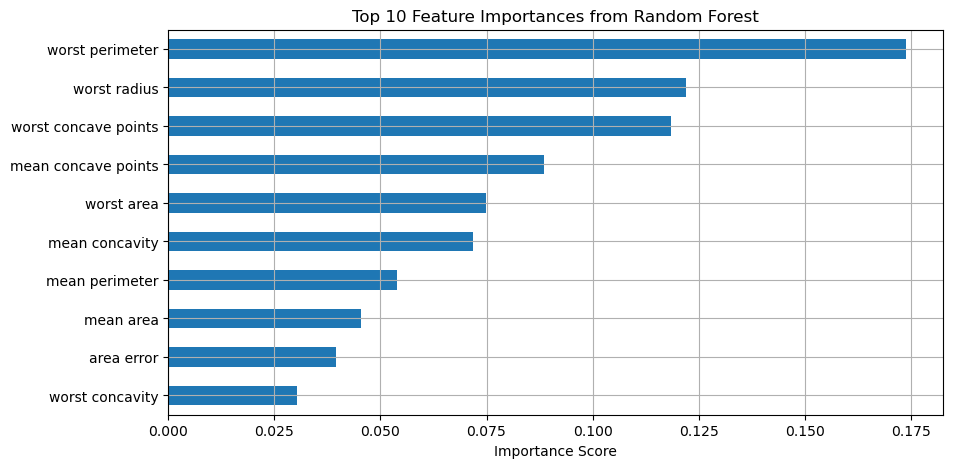

In [41]:
plt.figure(figsize=(10, 5))
importance.sort_values(ascending=True).tail(10).plot(kind='barh')
plt.title("Top 10 Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.grid(True)
plt.show()